http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html 

In [1]:
import numpy as np  
import pandas as pd 
import math

In [2]:
# Tells matplotlib to display images inline instead of a new window
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
year2001_5clusters = pd.read_csv("../../crimesInChicagoData/Unsupervised-MachineLearning/finalProject/year2001_5clusters.csv")

In [4]:
year2001_5clusters.head()

Unnamed: 0  index  IUCR                Primary Type  \
0           0      6  0266         CRIM SEXUAL ASSAULT   
1           1     17  1753  OFFENSE INVOLVING CHILDREN   
2           2     18  0840                       THEFT   
3           3     20  1754  OFFENSE INVOLVING CHILDREN   
4           4     25  1563                 SEX OFFENSE   

                      Description Location Description  Arrest  Domestic  \
0                       PREDATORY            RESIDENCE    True      True   
1   SEX ASSLT OF CHILD BY FAM MBR            RESIDENCE    True     False   
2   FINANCIAL ID THEFT: OVER $300                OTHER   False     False   
3  AGG SEX ASSLT OF CHILD FAM MBR            RESIDENCE    True     False   
4           CRIMINAL SEXUAL ABUSE            RESIDENCE   False     False   

   District    Year  Month  Day  Hour  index.1  clusters_5  
0       5.0  2001.0      1    1    11        0           1  
1       8.0  2001.0      1    1     0        1           4  
2       9.0  2001.0      1    1     0        2           3  
3       7.0  2001.0      6   16     8        3           2  
4      15.0  2001.0      6    1     8        4           1

In [5]:
year2001_5clusters = year2001_5clusters.drop(['Unnamed: 0', 'index'], axis =1 )

In [6]:
year2001_5clusters 

IUCR                Primary Type                     Description  \
0       0266         CRIM SEXUAL ASSAULT                       PREDATORY   
1       1753  OFFENSE INVOLVING CHILDREN   SEX ASSLT OF CHILD BY FAM MBR   
2       0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
3       1754  OFFENSE INVOLVING CHILDREN  AGG SEX ASSLT OF CHILD FAM MBR   
4       1563                 SEX OFFENSE           CRIMINAL SEXUAL ABUSE   
5       0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
6       0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
7       0842                       THEFT         AGG: FINANCIAL ID THEFT   
8       1752  OFFENSE INVOLVING CHILDREN   AGG CRIM SEX ABUSE FAM MEMBER   
9       0842                       THEFT         AGG: FINANCIAL ID THEFT   
10      0265         CRIM SEXUAL ASSAULT               AGGRAVATED: OTHER   
11      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
12      1150          DECEPTIVE PRACTICE               CREDIT CARD FRAUD   
13      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
14      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
15      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
16      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
17      2825               OTHER OFFENSE         HARASSMENT BY TELEPHONE   
18      1753  OFFENSE INVOLVING CHILDREN   SEX ASSLT OF CHILD BY FAM MBR   
19      1130          DECEPTIVE PRACTICE        FRAUD OR CONFIDENCE GAME   
20      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
21      1150          DECEPTIVE PRACTICE               CREDIT CARD FRAUD   
22      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
23      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
24      0841                       THEFT  FINANCIAL ID THEFT:$300 &UNDER   
25      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
26      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
27      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
28      1140          DECEPTIVE PRACTICE                    EMBEZZLEMENT   
29      0841                       THEFT  FINANCIAL ID THEFT:$300 &UNDER   
...      ...                         ...                             ...   
568487  0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
568488  0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
568489  0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
568490  1754  OFFENSE INVOLVING CHILDREN  AGG SEX ASSLT OF CHILD FAM MBR   
568491  1562                 SEX OFFENSE       AGG CRIMINAL SEXUAL ABUSE   
568492  0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
568493  1563                 SEX OFFENSE           CRIMINAL SEXUAL ABUSE   
568494  1752  OFFENSE INVOLVING CHILDREN   AGG CRIM SEX ABUSE FAM MEMBER   
568495  0560                     ASSAULT                          SIMPLE   
568496  0620                    BURGLARY                  UNLAWFUL ENTRY   
568497  0460                     BATTERY                          SIMPLE   
568498  1310             CRIMINAL DAMAGE                     TO PROPERTY   
568499  041A                     BATTERY             AGGRAVATED: HANDGUN   
568500  1310             CRIMINAL DAMAGE                     TO PROPERTY   
568501  0820                       THEFT                  $500 AND UNDER   
568502  0320                     ROBBERY           STRONGARM - NO WEAPON   
568503  5001               OTHER OFFENSE  OTHER CRIME INVOLVING PROPERTY   
568504  0320                     ROBBERY           STRONGARM - NO WEAPON   
568505  0610                    BURGLARY                  FORCIBLE ENTRY   
568506  0460                     BATTERY                          SIMPLE   
568507  0820                       THEFT                

In [7]:
year2001_5clusters.shape

(568517, 13)

# Training and Test Data Subset 

In [8]:
import random 
random.seed(1)

In [9]:
msk = np.random.rand(len(year2001_5clusters)) < 0.7

In [10]:
train = year2001_5clusters[msk]

In [11]:
test = year2001_5clusters[~msk]

In [12]:
len(train)

397750

In [13]:
len(test)

170767

# Train Text? 

In [14]:
train_x = train['Description'].values

In [15]:
train_y = train['clusters_5'].values

In [16]:
test_x = test['Description'].values

In [17]:
test_y = test['clusters_5'].values

# Tokenizing text with scikit-learn

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
count_vect = CountVectorizer()

In [20]:
train_counts = count_vect.fit_transform(train_x)

In [21]:
train_counts.shape

(397750, 341)

In [22]:
type(train_counts)

scipy.sparse.csr.csr_matrix

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
tfidf_transformer = TfidfTransformer()

In [25]:
train_x_tfidf = tfidf_transformer.fit_transform(train_counts)

In [26]:
train_x_tfidf.shape

(397750, 341)

In [27]:
test_counts = count_vect.transform(test_x)

In [28]:
test_x_tfidf = tfidf_transformer.transform(test_counts)

# Training a Classifier

In [29]:
from sklearn.naive_bayes import MultinomialNB


In [30]:
clf = MultinomialNB().fit(train_x_tfidf, train_y)

In [31]:
predicted = clf.predict(test_x_tfidf)

In [32]:
for test_row, cluster in zip(test_x, predicted): 
    print('%r => %s' % (test_row, train_y[cluster]))

'AGG CRIM SEX ABUSE FAM MEMBER' => 1
'AGG: FINANCIAL ID THEFT' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'FRAUD OR CONFIDENCE GAME' => 1
'CREDIT CARD FRAUD' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'HARASSMENT BY TELEPHONE' => 1
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'AGG SEX ASSLT OF CHILD FAM MBR' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'AGG CRIMINAL SEXUAL ABUSE' => 1
'PREDATORY' => 1
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'AUTOMOBILE' => 1
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'AGG: FINANCIAL ID THEFT' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'AGG SEX ASSLT OF CHILD FAM MBR' => 1
'FINANCIAL ID THEFT: OVER $300' => 1

'SIMPLE' => 4
'ATTEMPT FORCIBLE ENTRY' => 1
'ATTEMPT FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'CRIMINAL SEXUAL ABUSE' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'AGGRAVATED: HANDGUN' => 4
'OVER $500' => 1
'TO PROPERTY' => 2
'ARMED: HANDGUN' => 1
'AUTOMOBILE' => 1
'STRONGARM - NO WEAPON' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO VEHICLE' => 2
'FORCIBLE ENTRY' => 1
'ARMED: OTHER DANGEROUS WEAPON' => 1
'FORCIBLE ENTRY' => 1
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 1
'SIMPLE' => 4
'TO LAND' => 3
'ARMED: HANDGUN' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'TO LAND' => 3
'OVER $500' => 1
'UNLAWFUL ENTRY' => 1
'FORCIBLE ENTRY' => 1
'

'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'VIOLATE ORDER OF PROTECTION' => 1
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 1
'SIMPLE' => 4
'OVER $500' => 1
'HARASSMENT BY TELEPHONE' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 1
'FORCIBLE ENTRY' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'BY FIRE' => 1
'STRONGARM - NO WEAPON' => 1
'FORCIBLE ENTRY' => 1
'UNLAWFUL POSS OF HANDGUN' => 3
'TO VEHICLE' => 2
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'UNLAWFUL ENTRY' => 1
'ATTEMPT: STRONGARM-NO WEAPON' => 1
'AGGRAVATED' => 4
'TO VEHICLE' => 2
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'TO LAND' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'UNLA

'POSS: SYNTHETIC DRUGS' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'FOUND SUSPECT NARCOTICS' => 3
'TO LAND' => 3
'SIMPLE' => 4
'OVER $500' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SOLICIT ON PUBLIC WAY' => 3
'STRONGARM - NO WEAPON' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'SOLICIT ON PUBLIC WAY' => 3
'SIMPLE' => 4
'TO VEHICLE' => 2
'MANU/DELIVER:CRACK' => 3
'SIMPLE' => 4
'AGGRAVATED' => 4
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 1
'SOLICIT ON PUBLIC WAY' => 3
'SIMPLE' => 4
'HARASSMENT BY ELECTRONIC MEANS' => 1
'TO PROPERTY' => 2
'SOLICIT ON PUBLIC WAY' => 3
'$500 AND UNDER' => 1
'POSS: CANNABIS MORE THAN 30GMS' => 3
'SIMPLE' => 4
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'ATTEMPT ARSON' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'VIOLATE ORDER OF PROTECTION' => 1
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'FORCIBLE ENTRY' => 1
'SOLICIT ON PUBLIC WAY' => 3
'TO VEHICLE' => 2
'OVER $500' => 1
'SIMPLE' => 4
'POSS: CRAC

'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CRACK' => 3
'MANU/DELIVER:CRACK' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'MANU/DELIVER:CRACK' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'UNLAWFUL POSS OF HANDGUN' => 3
'POSS: CRACK' => 3
'POSS: CRACK' => 3
'$500 AND UNDER' => 1
'POSS: CRACK' => 3
'POSS: COCAINE' => 3
'VIOLATE ORDER OF PROTECTION' => 1
'SIMPLE' => 4
'VIOLATE ORDER OF PROTECTION' => 1
'OVER $500' => 1
'TELEPHONE THREAT' => 1
'AUTOMOBILE' => 1
'CHILD ABUSE' => 1
'SEX OFFENDER: FAIL TO REGISTER' => 1
'HARASSMENT BY TELEPHONE' => 1
'SIMPLE' => 4
'ATT: AUTOMOBILE' => 1
'TO PROPERTY' => 2
'TO PROPERTY' => 2
'SIMPLE' => 4
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'OVER $500' => 1
'OTHER VEHICLE OFFENSE' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TELEPHONE THREAT' => 1
'POSS: CRACK' => 3
'OTHER CRIME INVOLVING PROPERTY' => 1
'POSS: CRAC

'SIMPLE' => 4
'TO LAND' => 3
'FORCIBLE ENTRY' => 1
'FORCIBLE ENTRY' => 1
'OVER $500' => 1
'TO VEHICLE' => 2
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'UNLAWFUL USE HANDGUN' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'FORCIBLE ENTRY' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'TO PROPERTY' => 2
'THEFT/RECOVERY: AUTOMOBILE' => 1
'THEFT/RECOVERY: CYCLE, SCOOTER, BIKE W-VIN' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'FORCIBLE ENTRY' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 1
'OVER $500' => 1
'AUTOMOBILE' => 1
'OTHER VEHICLE OFFENSE' => 3
'AUTOMOBILE' => 1
'ARMED: HANDGUN' => 1
'OVER $500' => 1
'TO LAND' => 3
'HARASSMENT BY TELEPHONE' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'UNLAWFUL ENTRY' => 1
'$500 AND UNDER' => 1
'POSS: CRACK' => 3
'AGGRAVATED: HANDGUN' => 4
'POSS: COCAINE' => 3
'POSS: CRACK' => 3
'AUTOMOBILE' => 1
'ENDANGERING LIFE

'VIOLATE ORDER OF PROTECTION' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'TELEPHONE THREAT' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'TO LAND' => 3
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'TELEPHONE THREAT' => 1
'THEFT OF LOST/MISLAID PROP' => 3
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'TO VEHICLE' => 2
'AUTOMOBILE' => 1
'TO PROPERTY' => 2
'TELEPHONE THREAT' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO VEHICLE' => 2
'HARASSMENT BY TELEPHONE' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'OTHER CRIME INVOLVING PROPERTY' => 1
'TELEPHONE THREAT' => 1
'TELEPHONE THREAT' => 1
'TO VEHICLE' => 2
'STRONGARM - NO WEAPON' => 1
'OTHER CRIME INVOLVING PROPERTY' => 1
'STRONGARM - NO WEAPON'

'TO VEHICLE' => 2
'POSS: CANNABIS 30GMS OR LESS' => 3
'ARMED: HANDGUN' => 1
'$500 AND UNDER' => 1
'OTHER VEHICLE OFFENSE' => 3
'ATTEMPT: STRONGARM-NO WEAPON' => 1
'POSS: PCP' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 2
'SIMPLE' => 4
'POSS: CRACK' => 3
'ARMED: HANDGUN' => 1
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'THEFT/RECOVERY: AUTOMOBILE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CRACK' => 3
'POSS: HEROIN(WHITE)' => 3
'TO LAND' => 3
'SOLICIT ON PUBLIC WAY' => 3
'UNLAWFUL ENTRY' => 1
'$500 AND UNDER' => 1
'FOUND SUSPECT NARCOTICS' => 3
'UNLAWFUL POSS OF HANDGUN' => 3
'TO VEHICLE' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'POSS: COCAINE' => 3
'POSS: CRACK' => 3
'$500 AND UNDER' => 1
'SOLICIT ON PUBLIC WAY' => 3
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'PRO EMP HANDS NO/MIN INJURY' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS

'AGGRAVATED: HANDGUN' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AGG PRO.EMP:KNIFE/CUTTING INST' => 4
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: COCAINE' => 3
'OVER $500' => 1
'BOMB THREAT' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'CHILD ABUSE' => 1
'HARASSMENT BY TELEPHONE' => 1
'OTHER CRIME INVOLVING PROPERTY' => 1
'BOGUS CHECK' => 1
'POSS: CRACK' => 3
'THEFT OF LABOR/SERVICES' => 3
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'FORCIBLE ENTRY' => 1
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 1
'SIMPLE' => 4
'BY FIRE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 2
'POSS: CRACK' => 3
'AGGRAVATED' => 4
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'HARASSMENT BY ELECTRONIC MEANS' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'ILLEGAL CONSUMPTION BY MINO

'OVER $500' => 1
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'STRONGARM - NO WEAPON' => 1
'CHILD ABUSE' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'ARMED: HANDGUN' => 1
'HARASSMENT BY TELEPHONE' => 1
'SIMPLE' => 4
'THEFT/RECOVERY: AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'TO VEHICLE' => 2
'AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SOLICIT ON PUBLIC WAY' => 3
'SIMPLE' => 4
'AUTOMOBILE' => 1
'UNLAWFUL POSS OF HANDGUN' => 3
'POSS: CRACK' => 3
'$500 AND UNDER' => 1
'OTHER CRIME AGAINST PERSON' => 1
'AGGRAVATED: OTHER FIREARM' => 4
'SIMPLE' => 4
'POSS: COCAINE' => 3
'SIMPLE' => 4
'TO LAND' => 3
'POSS: CANNABIS MORE THAN 30GMS' => 3
'SIMPLE' => 4
'VIOLATE ORDER OF PROTECTION' => 1
'$500 AND UNDER' => 1
'POSS: HEROIN(WHITE)' => 3
'TO PROPERTY' => 2
'TO LAND' => 3
'OVER $500' => 1
'POSS: CANNABIS MORE THAN 30GMS' => 3
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'BY FIRE' => 1
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' =>

'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 3
'$500 AND UNDER' => 1
'POSS: CRACK' => 3
'HARASSMENT BY TELEPHONE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'SALE/DEL HYPODERMIC NEEDLE' => 3
'TELEPHONE THREAT' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'HARASSMENT BY TELEPHONE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'OTHER CRIME INVOLVING PROPERTY' => 1
'OTHER CRIME INVOLVING PROPERTY' => 1
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'FORCIBLE ENTRY' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'POSS: CRACK' => 3
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'POSS: CRACK' => 3
'FORCIBLE ENTRY' => 1
'POSS: HEROIN(WHITE)' => 3
'AUTOMOBILE' => 1
'OVER $500' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'BRIBERY' => 3
'SIMPLE' => 4
'TO PROPERTY' => 2
'OVER $500' => 1
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'SOLICIT ON PUBLIC WAY' => 3
'AGGRAVATED: OTHER DANG WEAPON' => 4
'MANU/DELIVER:PCP' => 3
'POSS: HEROIN(WHITE

'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'PUBLIC INDECENCY' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 2
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'OTHER CRIME AGAINST PERSON' => 1
'NON-AGGRAVATED' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'UNLAWFUL RESTRAINT' => 1
'SIMPLE' => 4
'OVER $500' => 1
'AUTOMOBILE' => 1
'STRONGARM - NO WEAPON' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'BOMB THREAT' => 1
'AGGRAVATED: OTHER FIREARM' => 4
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'TO PROPERTY' => 2
'TO VEHICLE' => 2
'UNLAWFUL POSS OF HANDGUN' => 3
'OTHER CRIME INVOLVING PROPERTY' => 1
'TO VEHICLE' => 2
'CRIMINAL SEXUAL ABUSE' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'TO PROPERTY' => 2
'FORCIBLE ENTRY' => 1
'OVER $500' => 1
'TO VEHICLE' => 2
'UNLAWFUL ENTRY' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DAN

'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: HEROIN(WHITE)' => 3
'TO LAND' => 3
'POSS: CRACK' => 3
'POSS: CRACK' => 3
'HARASSMENT BY TELEPHONE' => 1
'TO LAND' => 3
'POSS: CRACK' => 3
'OVER $500' => 1
'TO PROPERTY' => 2
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'SIMPLE' => 4
'THEFT/RECOVERY: AUTOMOBILE' => 1
'OVER $500' => 1
'OTHER CRIME INVOLVING PROPERTY' => 1
'SIMPLE' => 4
'BOMB THREAT' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'TELEPHONE THREAT' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'TELEPHONE THREAT' => 1
'AUTOMOBILE' => 1
'TO PROPERTY' => 2
'TO PROPERTY' => 2
'OTHER VEHICLE OFFENSE' => 3
'VIOLATE ORDER OF PROTECTION' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 1
'TELEPHONE THREAT' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'OVER $500' =

'AUTOMOBILE' => 1
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'POSS: HEROIN(WHITE)' => 3
'TO STATE SUP LAND' => 3
'TO VEHICLE' => 2
'POSS: HEROIN(WHITE)' => 3
'$500 AND UNDER' => 1
'TO LAND' => 3
'TO STATE SUP LAND' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'ATTEMPT THEFT' => 1
'THEFT/RECOVERY: TRUCK,BUS,MHOME' => 1
'AUTOMOBILE' => 1
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'POSS: CRACK' => 3
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'POSS: CRACK' => 3
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'AGGRAVATED: HANDGUN' => 4
'OVER $500' => 1
'VIOLATE ORDER OF PROTECTION' => 1
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'AUTOMOBILE' => 1
'UNLAWFUL ENTRY' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'CREDIT CARD FRAUD' => 1
'POS: HYPODERMIC NEEDLE' => 3
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'ATTEMPT FORCIBLE ENTRY' => 1
'POSS: HALLUCINOGENS' => 3
'FORCIBLE ENTRY' => 1
'SIMPLE

'SOLICIT ON PUBLIC WAY' => 3
'TELEPHONE THREAT' => 1
'CHILD ABUSE' => 1
'FOUND SUSPECT NARCOTICS' => 3
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO STATE SUP LAND' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: HALLUCINOGENS' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CRACK' => 3
'SIMPLE' => 4
'TO STATE SUP LAND' => 3
'POSS: HEROIN(WHITE)' => 3
'THEFT OF LOST/MISLAID PROP' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'PATRONIZING A PROSTITUTE' => 3
'PUBLIC INDECENCY' => 3
'POSS: CRACK' => 3
'THEFT/RECOVERY: AUTOMOBILE' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'THEFT/RECOVERY: AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CRACK' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'POSS: HEROIN(WHITE)' => 3
'COUNTERFEITING DOCUMENT' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'BOGUS CHECK' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'$500 AND UNDER' => 1
'SIMPLE' =>

'TO VEHICLE' => 2
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'AUTOMOBILE' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'TO VEHICLE' => 2
'OVER $500' => 1
'SIMPLE' => 4
'BOGUS CHECK' => 1
'SOLICIT FOR BUSINESS' => 3
'MANU/DELIVER: HEROIN (WHITE)' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: COCAINE' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'HARASSMENT BY TELEPHONE' => 1
'OVER $500' => 1
'FRAUD OR CONFIDENCE GAME' => 1
'SOLICIT ON PUBLIC WAY' => 3
'SOLICIT ON PUBLIC WAY' => 3
'FRAUD OR CONFIDENCE GAME' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'TO PROPERTY' => 2
'ILLEGAL USE CASH CARD' => 1
'FORGERY' => 1
'POSS: CRACK' => 3
'AGGRAVATED: OTHER DANG WEAPON' => 4
'OVER $500' => 1
'SOLICIT ON PUBLIC WAY' => 3
'TO VEHICLE' => 2
'POSS: CRACK' => 3
'SIMPLE' => 4
'TO VEHICLE' => 2
'SOLICIT ON PUBLIC WAY' => 3
'AGG CRIMINAL SEXUAL ABUSE' => 1
'AUTOMOBILE' => 1
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'MANU/DEL:CANNABIS 10GM OR LESS' => 3
'O

'AUTOMOBILE' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'AGGRAVATED VEHICULAR HIJACKING' => 1
'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'UNLAWFUL ENTRY' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'VIOLATE ORDER OF PROTECTION' => 1
'FORCIBLE ENTRY' => 1
'AUTOMOBILE' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO STATE SUP LAND' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'OTHER VEHICLE OFFENSE' => 3
'SIMPLE' => 4
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO LAND' => 3
'ATTEMPT FORCIBLE ENTRY' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'FINAN EXPLOIT-ELDERLY/DISABLED' => 1
'TO STATE SUP LAND' => 3
'ARSON THREAT' => 1
'OVER $500' => 1
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'VIOLATE ORDER OF PROTECTION' => 1
'OVER $500' => 1
'THEFT OF LABOR/SERVICES' => 3
'SIMPLE' => 4
'THEFT/RECOVERY: AU

'POSS: AMPHETAMINES' => 3
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO PROPERTY' => 2
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'$500 AND UNDER' => 1
'POSS: CRACK' => 3
'AGGRAVATED VEHICULAR HIJACKING' => 1
'FRAUD OR CONFIDENCE GAME' => 1
'POSS: CRACK' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'POSS: CRACK' => 3
'$500 AND UNDER' => 1
'POSS: HEROIN(WHITE)' => 3
'TO VEHICLE' => 2
'AUTOMOBILE' => 1
'TO PROPERTY' => 2
'TO VEHICLE' => 2
'TO VEHICLE' => 2
'AUTOMOBILE' => 1
'OVER $500' => 1
'TO VEHICLE' => 2
'HARASSMENT BY TELEPHONE' => 1
'TO VEHICLE' => 2
'FRAUD OR CONFIDENCE GAME' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'TO PROPERTY' => 2
'OVER $500' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'ATTEMPT FORCIBLE ENTRY' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'HARASSMENT BY TELEPHONE' => 1
'TELEPHONE THREAT' => 1
'FORCIBLE ENTRY' => 1
'OVER $500' =

'TO PROPERTY' => 2
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'VIOLATE ORDER OF PROTECTION' => 1
'OVER $500' => 1
'POSS: CRACK' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'MANU/DELIVER: HEROIN (WHITE)' => 3
'HARASSMENT BY TELEPHONE' => 1
'TO VEHICLE' => 2
'CHILD ABUSE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'THEFT OF LABOR/SERVICES' => 3
'SIMPLE' => 4
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'SOLICIT ON PUBLIC WAY' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'POSS: COCAINE' => 3
'TO VEHICLE' => 2
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'AGGRAVATED: HANDGUN' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: HEROIN(WHITE)' => 3
'CHILD ABUSE' => 1
'GAME/AMUSEMENT DEVICE' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'MANU/DEL:CANNABIS 10GM OR LESS' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CRACK' => 3
'TO PROPERTY' => 2
'TO STATE SUP LAND' => 3
'FORCIBLE ENTRY' => 1
'TO VEHIC

'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 1
'UNLAWFUL ENTRY' => 1
'SIMPLE' => 4
'OVER $500' => 1
'TO LAND' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'AGGRAVATED PO: HANDGUN' => 4
'UNLAWFUL ENTRY' => 1
'ATT: AUTOMOBILE' => 1
'AGGRAVATED: HANDGUN' => 4
'TO PROPERTY' => 2
'SIMPLE' => 4
'ATTEMPT THEFT' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'THEFT OF LABOR/SERVICES' => 3
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'TELEPHONE THREAT' => 1
'UNLAWFUL ENTRY' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'TO VEHICLE' => 2
'ATTEMPT: STRONGARM-NO WEAPON' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'TO STATE SUP LAND' => 3
'SIMPLE' => 4
'SIMPLE'

'POSS: HEROIN(WHITE)' => 3
'NON-AGGRAVATED' => 4
'SIMPLE' => 4
'TELEPHONE THREAT' => 1
'SIMPLE' => 4
'POSS: CRACK' => 3
'THEFT OF LABOR/SERVICES' => 3
'ATTEMPT: STRONGARM-NO WEAPON' => 1
'THEFT OF LABOR/SERVICES' => 3
'AGGRAVATED: HANDGUN' => 4
'UNLAWFUL POSS OF HANDGUN' => 3
'TO LAND' => 3
'AGGRAVATED: OTHER DANG WEAPON' => 4
'POSS: CRACK' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO STATE SUP LAND' => 3
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 2
'AGG PO HANDS NO/MIN INJURY' => 4
'ARMED: HANDGUN' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO VEHICLE' => 2
'TO VEHICLE' => 2
'TO STATE SUP LAND' => 3
'OVER $500' => 1
'TO PROPERTY' => 2
'OVER $500' => 1
'TO STATE SUP LAND' => 3
'SIMPLE' => 4
'OVER $500' => 1
'UNLAWFUL POSS OF HANDGUN' => 3
'OVER $500' => 1
'SIMPLE' => 4
'ILLEGAL USE CASH CARD' => 1
'SIMPLE' => 4
'UNLAWFUL POSS OF HANDGUN' => 3
'TO STATE SUP LAND' => 3
'TO PROPERTY' => 2
'TO PROPERTY' => 2
'AGGRAVATED: OTHER DANG WEAPON

'POSS: HEROIN(WHITE)' => 3
'TO LAND' => 3
'ATT: AUTOMOBILE' => 1
'FORFEIT PROPERTY' => 3
'POSS: HEROIN(WHITE)' => 3
'OTHER CRIME INVOLVING PROPERTY' => 1
'POSS: HEROIN(WHITE)' => 3
'AGGRAVATED: OTHER DANG WEAPON' => 4
'UNLAWFUL ENTRY' => 1
'AUTOMOBILE' => 1
'STRONGARM - NO WEAPON' => 1
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'ILLEGAL CONSUMPTION BY MINOR' => 3
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'TELEPHONE THREAT' => 1
'POSS: HEROIN(WHITE)' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'OVER $500' => 1
'THEFT OF LABOR/SERVICES' => 3
'POSS: CANNABIS MORE THAN 30GMS' => 3
'AUTOMOBILE' => 1
'SIMPLE' => 4
'TO VEHICLE' => 2
'FOUND SUSPECT NARCOTICS' => 3
'ARMED: HANDGUN' => 1
'POSS: CANNABIS MORE THAN 30GMS' => 3
'FOUND SUSPECT NARCOTICS' => 3
'SIMPLE' => 4
'TO PROPERTY' => 2
'TELEPHONE THREAT' => 1
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'SOLICIT ON PUBLIC WAY' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 3
'POSS: CANNABIS 30GMS OR LE

'TO VEHICLE' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO LAND' => 3
'$500 AND UNDER' => 1
'TO LAND' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 2
'TO VEHICLE' => 2
'UNLAWFUL ENTRY' => 1
'TO VEHICLE' => 2
'TO VEHICLE' => 2
'TO VEHICLE' => 2
'OTHER VEHICLE OFFENSE' => 3
'TO PROPERTY' => 2
'FINANCIAL ID THEFT: OVER $300' => 1
'FRAUD OR CONFIDENCE GAME' => 1
'OVER $500' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'NON-AGGRAVATED' => 4
'OVER $500' => 1
'TO VEHICLE' => 2
'TO VEHICLE' => 2
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 1
'AGGRAVATED: HANDGUN' => 4
'FORCIBLE ENTRY' => 1
'AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 1
'ATT: AUTOMOBILE' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 1
'THEFT/RECOV

'TO PROPERTY' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'SOLICIT ON PUBLIC WAY' => 3
'POSS: HEROIN(WHITE)' => 3
'HARASSMENT BY TELEPHONE' => 1
'SIMPLE' => 4
'ATT: AUTOMOBILE' => 1
'BOGUS CHECK' => 1
'SIMPLE' => 4
'OVER $500' => 1
'TO PROPERTY' => 2
'THEFT OF LABOR/SERVICES' => 3
'OVER $500' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'OVER $500' => 1
'SIMPLE' => 4
'VIOLATE ORDER OF PROTECTION' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'AGGRAVATED: OTHER DANG WEAPON' => 4
'ENDANGERING LIFE/HEALTH CHILD' => 1
'BOGUS CHECK' => 1
'SIMPLE' => 4
'TO LAND' => 3
'ARMED: HANDGUN' => 1
'TO PROPERTY' => 2
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'CHILD ABUSE' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO VEHICLE' => 2
'POSS: CRACK' => 3
'POSS: HEROIN(WHITE)' => 3
'SIMPLE' => 4
'OVER $500' => 1
'POSS: CANN

'UNLAWFUL USE OTHER DANG WEAPON' => 4
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'BOMB THREAT' => 1
'HARASSMENT BY TELEPHONE' => 1
'POSS: CRACK' => 3
'OVER $500' => 1
'POSS: HALLUCINOGENS' => 3
'SIMPLE' => 4
'OTHER' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'MANU/DEL:CANNABIS 10GM OR LESS' => 3
'POSS: CANNABIS MORE THAN 30GMS' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'UNLAWFUL POSS OF HANDGUN' => 3
'TO VEHICLE' => 2
'POSS: CRACK' => 3
'SIMPLE' => 4
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'POSS: HEROIN(BRN/TAN)' => 3
'POSS: COCAINE' => 3
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'POSS: HEROIN(WHITE)' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CRACK' => 3
'POSS: CANNABIS MORE THAN 30GMS' => 3
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'HARASSMENT BY TELEPHONE' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'AUTOMOBILE' => 1
'COUNTERFEITING DOCUMENT' => 1

'POSS: CANNABIS 30GMS OR LESS' => 3
'AUTOMOBILE' => 1
'UNLAWFUL USE OTHER DANG WEAPON' => 4
'TO VEHICLE' => 2
'OBSTRUCTING JUSTICE' => 3
'FORFEIT PROPERTY' => 3
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'VEHICULAR HIJACKING' => 1
'OVER $500' => 1
'OVER $500' => 1
'POSS: CRACK' => 3
'SIMPLE' => 4
'VIOLATE ORDER OF PROTECTION' => 1
'FORCIBLE ENTRY' => 1
'FORGERY' => 1
'SIMPLE' => 4
'AGGRAVATED VEHICULAR HIJACKING' => 1
'$500 AND UNDER' => 1
'ATTEMPT: ARMED-HANDGUN' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'TO VEHICLE' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'FOUND SUSPECT NARCOTICS' => 3
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'OTHER VEHICLE OFFENSE' => 3
'AGGRAVATED: HANDGUN' => 4
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'SOLICIT ON PUBLIC WAY' => 3
'HARASSMENT BY TELEPHONE' => 1
'STRONGARM - NO WEAPON' => 1
'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'T

'SIMPLE' => 4
'POSS: CRACK' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: HEROIN(WHITE)' => 3
'TO VEHICLE' => 2
'POSS: CANNABIS 30GMS OR LESS' => 3
'TO VEHICLE' => 2
'AGGRAVATED: HANDGUN' => 4
'ILLEGAL CONSUMPTION BY MINOR' => 3
'POSS: HEROIN(WHITE)' => 3
'POSS: HEROIN(WHITE)' => 3
'ATTEMPT POSSESSION NARCOTICS' => 3
'UNLAWFUL POSS OF HANDGUN' => 3
'TELEPHONE THREAT' => 1
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'POSS: SYNTHETIC DRUGS' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'SOLICIT ON PUBLIC WAY' => 3
'OVER $500' => 1
'UNLAWFUL POSS OF HANDGUN' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'FRAUD OR CONFIDENCE GAME' => 1
'FORCIBLE ENTRY' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'FALSE POLICE REPORT' => 3
'TO PROPERTY' => 2
'OVER $500' => 1
'TO PROPERTY' => 2
'FINANCIAL ID THEFT: OVER $300' => 1
'OVER $500' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'OTHER VEHICLE OFFENSE' => 3
'UNLAWFUL ENTRY' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OTHER VEHIC

'SIMPLE' => 4
'TELEPHONE THREAT' => 1
'TELEPHONE THREAT' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'UNLAWFUL ENTRY' => 1
'TO VEHICLE' => 2
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'OVER $500' => 1
'OVER $500' => 1
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'TELEPHONE THREAT' => 1
'OTHER VEHICLE OFFENSE' => 3
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 1
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 1
'HARASSMENT BY TELEPHONE' => 1
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'OVER $500' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'HARASSMENT BY TELEPHONE' => 1
'SIMPLE' => 4
'TO VEHICLE' => 2
'AUTOMOBILE' => 1
'OVER $500' => 1
'HARASSMENT BY TELEPHONE' => 1
'OVER $500' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'FORCIBLE ENTRY' => 1
'TO VEHICLE' => 2
'OVER $500' => 1
'OVER $500' => 1
'SIMPLE' => 4
'LICENSE VIOLATION' => 3
'TO PROPERTY' => 2
'OVER $500' => 1
'TO PROPERTY' => 2
'AUTOMOBILE' => 1
'OT

'OVER $500' => 1
'TO PROPERTY' => 2
'TO LAND' => 3
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'AUTOMOBILE' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'VIOLATE ORDER OF PROTECTION' => 1
'FORCIBLE ENTRY' => 1
'SELL/GIVE/DEL LIQUOR TO MINOR' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'TO PROPERTY' => 2
'SIMPLE' => 4
'TO VEHICLE' => 2
'UNLAWFUL ENTRY' => 1
'UNLAWFUL ENTRY' => 1
'POSS: CRACK' => 3
'BOGUS CHECK' => 1
'$500 AND UNDER' => 1
'ATTEMPT FORCIBLE ENTRY' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'HARASSMENT BY TELEPHONE' => 1
'UNLAWFUL ENTRY' => 1
'SELL/GIVE/DEL LIQUOR TO MINOR' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'OTHER VEHICLE OFFENSE' => 3
'POSS: CRACK' => 3
'UNLAWFUL POSS OF HANDGUN' => 3
'MANU/DEL:CANNABIS 10GM OR LESS' => 3
'OVER $500' => 1
'TELEPHONE THREAT' => 1
'FOUND SUSPECT NARCOTICS' => 3
'SIMPLE' => 4
'SOLICIT ON PUBLIC WAY' 

'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'CHILD ABUSE' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'OVER $500' => 1
'TO LAND' => 3
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'TO VEHICLE' => 2
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'AGGRAVATED: OTHER FIREARM' => 4
'SIMPLE' => 4
'TO PROPERTY' => 2
'AUTOMOBILE' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'ARMED: OTHER DANGEROUS WEAPON' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO VEHICLE' => 2
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'AGGRAVATED VEHICULAR HIJACKING' => 1
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'AGGRAVATED: HANDGUN' => 4
'THEFT OF LABOR/SERVICES' => 3
'AGGRAVATED: OTHER DANG WEAPON' => 4
'THEFT OF LABOR/SERVICES' => 3
'TO PROPERTY' => 2
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO VEHICLE' => 2
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'FORCIBLE ENTRY' 

'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'OTHER CRIME INVOLVING PROPERTY' => 1
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 1
'TO LAND' => 3
'$500 AND UNDER' => 1
'OVER $500' => 1
'STRONGARM - NO WEAPON' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'OTHER VEHICLE OFFENSE' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'VEHICULAR HIJACKING' => 1
'OVER $500' => 1
'ARMED: OTHER DANGEROUS WEAPON' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 3
'OVER $500' => 1
'SIMPLE' => 4
'OVER $500' => 1
'FRAUD OR CONFIDENCE GAME' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO VEHICLE' => 2
'POSS: HEROIN(WHITE)' => 3
'ATT: AUTOMOBILE' => 1
'POSS: CRACK' => 3
'FORCIBLE ENTRY' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'FORCIBLE ENTRY' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'OTHER VEHICLE OFFENSE' => 3
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'OVER

'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'AGGRAVATED: HANDGUN' => 4
'TELEPHONE THREAT' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'BOMB THREAT' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'FINANCIAL ID THEFT: OVER $300' => 1
'CREDIT CARD FRAUD' => 1
'OTHER VEHICLE OFFENSE' => 3
'SIMPLE' => 4
'OVER $500' => 1
'VIOLATE ORDER OF PROTECTION' => 1
'SIMPLE' => 4
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'POSS: CANNABIS MORE THAN 30GMS' => 3
'FOUND SUSPECT NARCOTICS' => 3
'OVER $500' => 1
'TO PROPERTY' => 2
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO LAND' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'GAME/AMUSEMENT DEVICE' => 3
'AUTOMOBILE' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'ARMED: OTHER FIREARM' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'POSS: CRACK' => 3
'HARASSMENT BY TELEPHONE' => 1
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'SIMPLE' => 4
'TO PROPERTY' => 2
'T

'OVER $500' => 1
'TO PROPERTY' => 2
'BY FIRE' => 1
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'ATT: AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'VIOLATE ORDER OF PROTECTION' => 1
'STOLEN PROP: BUY/RECEIVE/POS.' => 3
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'TO PROPERTY' => 2
'FORCIBLE ENTRY' => 1
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'TO VEHICLE' => 2
'OVER $500' => 1
'SIMPLE' => 4
'THEFT OF LABOR/SERVICES' => 3
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 1
'CHILD ABUSE' => 1
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'CYCLE, SCOOTER, BIKE W-VIN' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'ATTEMPT POSSESSION NAR

'FORCIBLE ENTRY' => 1
'AGGRAVATED: HANDGUN' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'TO STATE SUP LAND' => 3
'CREDIT CARD FRAUD' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'FORGERY' => 1
'SIMPLE' => 4
'ATTEMPT FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'POSS: CRACK' => 3
'TO PROPERTY' => 2
'POSS: CANNABIS 30GMS OR LESS' => 3
'OTHER VEHICLE OFFENSE' => 3
'TO VEHICLE' => 2
'OVER $500' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'POSS: COCAINE' => 3
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'BOGUS CHECK' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'ATTEMPT THEFT' => 1
'POSS: HEROIN(WHITE)' => 3
'OVER $500' => 1
'STRONGARM - NO WEAPON' => 1
'ATTEMPT THEFT' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'THEFT BY LESSEE,MOTOR VEH' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'$500 AND UNDER' => 

'POSS: CRACK' => 3
'SIMPLE' => 4
'POSS: CRACK' => 3
'UNLAWFUL ENTRY' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'POSS: CRACK' => 3
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'$500 AND UNDER' => 1
'MANU/DELIVER:CRACK' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'TO VEHICLE' => 2
'OVER $500' => 1
'SOLICIT ON PUBLIC WAY' => 3
'POSS: CRACK' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CRACK' => 3
'STRONGARM - NO WEAPON' => 1
'POSS: HEROIN(WHITE)' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'SOLICIT FOR BUSINESS' => 3
'POSS: CRACK' => 3
'$500 AND UNDER' => 1
'SOLICIT FOR BUSINESS' => 3
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'GAME/DICE' => 3
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'TO VEHICLE' => 2
'POSS: CRACK' => 3
'OVER $500' => 1
'POSS: CRACK' => 3
'OVER $500' => 1
'OVER $500' => 1
'POSS: HEROIN(WHITE)' => 3
'TO VEHICLE' => 2
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'TO PROPERTY'

'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO PROPERTY' => 2
'OVER $500' => 1
'AUTOMOBILE' => 1
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'OVER $500' => 1
'SIMPLE' => 4
'TO VEHICLE' => 2
'TO STATE SUP LAND' => 3
'SIMPLE' => 4
'AUTOMOBILE' => 1
'TO LAND' => 3
'TO VEHICLE' => 2
'SIMPLE' => 4
'ATT: AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'CRIMINAL SEXUAL ABUSE' => 1
'UNLAWFUL ENTRY' => 1
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 1
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'SIMPLE' => 4
'OVER $500' => 1
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'OVER $500' => 1
'TO VEHICLE' => 2
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'VEHICULAR HIJACKING' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 2
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'OTHER CRIME INVOLVING PRO

'POSS: CRACK' => 3
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'TO LAND' => 3
'$500 AND UNDER' => 1
'OVER $500' => 1
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO PROPERTY' => 2
'OVER $500' => 1
'IMPERSONATION' => 4
'TO VEHICLE' => 2
'TO VEHICLE' => 2
'TELEPHONE THREAT' => 1
'TELEPHONE THREAT' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'SOLICIT FOR BUSINESS' => 3
'POSS: CRACK' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'THEFT OF LABOR/SERVICES' => 3
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'TO PROPERTY' => 2
'OTHER CRIME AGAINST PERSON' => 1
'AUTOMOBILE' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'OTHER CRIME AGAINST PERSON' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CRACK' => 3
'TO PROPERTY' => 2
'POSS: CANNABIS 30GMS OR LESS' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CRACK' => 3
'UNLAWFUL P

'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 1
'THEFT OF LABOR/SERVICES' => 3
'TO VEHICLE' => 2
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'NON-AGGRAVATED' => 4
'ARMED: HANDGUN' => 1
'VIOLATE ORDER OF PROTECTION' => 1
'FORCIBLE ENTRY' => 1
'UNLAWFUL ENTRY' => 1
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'ATTEMPT THEFT' => 1
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'STRONGARM - NO WEAPON' => 1
'STRONGARM - NO WEAPON' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 2
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'ARMED: HANDGUN' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'ILLEGAL CONSUMPTION BY MINOR' => 3
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO LAND' => 3
'POSS: CRACK' => 3
'SOLICIT ON PUBLIC WAY' => 3
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'ATTEMPT: STRONGARM-NO WE

'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED PO: OTHER DANG WEAP' => 4
'OVER $500' => 1
'UNLAWFUL ENTRY' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'TO VEHICLE' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'OVER $500' => 1
'TO VEHICLE' => 2
'OTHER VEHICLE OFFENSE' => 3
'$500 AND UNDER' => 1
'PEEPING TOM' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 2
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'AGGRAVATED: HANDGUN' => 4
'UNLAWFUL USE/SALE AIR RIFLE' => 3
'POSS: HEROIN(WHITE)' => 3
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'$500 AND UNDER' => 1
'POSS: CRACK' => 3
'POSS: CRACK' => 3
'SIMPLE' => 4
'POSS: CRACK' => 3
'TO VEHICLE' => 2
'CHILD ABUSE' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'AUTOMOBILE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'AGGRAVATED: HANDG

'TO VEHICLE' => 2
'HARASSMENT BY TELEPHONE' => 1
'OVER $500' => 1
'TELEPHONE THREAT' => 1
'$500 AND UNDER' => 1
'ARSON THREAT' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'TELEPHONE THREAT' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'THEFT BY LESSEE,MOTOR VEH' => 1
'OTHER VEHICLE OFFENSE' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'CHILD ABUSE' => 1
'ATTEMPT FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 2
'OVER $500' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO PROPERTY' => 2
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 1
'OVER $500' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'UNLAWFUL ENTRY' => 1
'FRAUD OR CONFIDENCE GAME' => 1
'$500 AND UNDER' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'FINANCIAL ID THEFT: OVER $300' => 1
'FORCIBLE ENTRY' => 1
'TO PROPERTY' => 2
'THEF

'GAME/DICE' => 3
'$500 AND UNDER' => 1
'POSS: CRACK' => 3
'OVER $500' => 1
'TO PROPERTY' => 2
'PUBLIC INDECENCY' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'OVER $500' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'POSS: HEROIN(WHITE)' => 3
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'OVER $500' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'OVER $500' => 1
'POSS: CRACK' => 3
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'SOLICIT ON PUBLIC WAY' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'THEFT OF LABOR/SERVICES' => 3
'UNLAWFUL ENTRY' => 1
'POSS: HEROIN(WHITE)' => 3
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'$500 AND UNDER' => 1
'POSS: CRACK' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CANNABIS MORE THAN 30GMS' => 3
'AUTOMOBILE' => 1
'SOLICIT ON PUBLIC WAY' => 3
'TO PROPERTY' => 2
'CAB OPERATION' => 3
'TO VEHICLE' => 2
'POSS: CRACK' => 3
'SIMPLE' => 4
'BY FIRE' => 1
'POSS: CRACK' => 3
'POSS: CRACK' => 3

'AUTOMOBILE' => 1
'OVER $500' => 1
'OVER $500' => 1
'AUTOMOBILE' => 1
'UNLAWFUL ENTRY' => 1
'TO STATE SUP PROP' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'ILLEGAL USE CASH CARD' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'PUBLIC INDECENCY' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 2
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'SEX OFFENDER: FAIL REG NEW ADD' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'AGGRAVATED: HANDGUN' => 4
'OVER $500' => 1
'ATTEMPT: STRONGARM-NO WEAPON' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SEX OFFENDER: FAIL REG NEW ADD' => 1
'AGGRAVATED: HANDGUN' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'TO LAND' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'UNLAWFUL ENTRY' => 1
'OVER $500' => 1
'SIMPLE' =

'THEFT/RECOVERY: AUTOMOBILE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'SOLICIT ON PUBLIC WAY' => 3
'ILLEGAL CONSUMPTION BY MINOR' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'POSS: CRACK' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SALE/DEL HYPODERMIC NEEDLE' => 3
'AGGRAVATED: OTHER DANG WEAPON' => 4
'POSS: CRACK' => 3
'MANU/DEL:CANNABIS OVER 10 GMS' => 3
'POSS: HEROIN(WHITE)' => 3
'TO LAND' => 3
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'OTHER VEHICLE OFFENSE' => 3
'AUTOMOBILE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'SEX OFFENDER: FAIL TO REGISTER' => 1
'POSS: CRACK' => 3
'TO PROPERTY' => 2
'POSS: CRACK' => 3
'UNLAWFUL USE/SALE AIR RIFLE' => 3
'ATTEMPT THEFT' => 1
'TO LAND' => 3
'OTHER VEHICLE OFFENSE' => 3
'TO STATE SUP LAND' => 3
'POSS: CRACK' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'SEX OFFENDER: FAIL TO REGISTER' => 1
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'SOLICI

'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CRACK' => 3
'FORGERY' => 1
'SIMPLE' => 4
'OVER $500' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'BOGUS CHECK' => 1
'TO PROPERTY' => 2
'FORCIBLE ENTRY' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'OVER $500' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'TO VEHICLE' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'CREDIT CARD FRAUD' => 1
'TO LAND' => 3
'$500 AND UNDER' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'UNLAWFUL INTERFERE/VISITATION' => 1
'HARASSMENT BY TELEPHONE' => 1
'OVER $500' => 1
'HARASSMENT BY TELEPHONE' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'CREDIT CARD FRAUD' => 1
'TO PROPERTY' => 2
'TO VEHICLE' => 2
'HARASSMENT BY TELEPHONE' => 1
'$500 AND UNDER' => 1
'$500 AND U

'SIMPLE' => 4
'SIMPLE' => 4
'THEFT OF LABOR/SERVICES' => 3
'SIMPLE' => 4
'THEFT/RECOVERY: AUTOMOBILE' => 1
'EMBEZZLEMENT' => 4
'SIMPLE' => 4
'OVER $500' => 1
'AUTOMOBILE' => 1
'OBSTRUCTING JUSTICE' => 3
'TO LAND' => 3
'UNLAWFUL ENTRY' => 1
'OVER $500' => 1
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'BOGUS CHECK' => 1
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'TO PROPERTY' => 2
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'NON-AGGRAVATED' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO LAND' => 3
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 2
'SEX OFFENDER: FAIL REG NEW ADD' => 1
'UNLAWFUL ENTRY' => 1
'UNLAWFUL ENTRY' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'$500 AND UNDER

'STOLEN PROP: BUY/RECEIVE/POS.' => 3
'POSS: CRACK' => 3
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'ARMED: HANDGUN' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'FRAUD OR CONFIDENCE GAME' => 1
'FORCIBLE ENTRY' => 1
'THEFT OF LABOR/SERVICES' => 3
'OVER $500' => 1
'AUTOMOBILE' => 1
'CREDIT CARD FRAUD' => 1
'HARASSMENT BY TELEPHONE' => 1
'TO PROPERTY' => 2
'FORCIBLE ENTRY' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'FORCIBLE ENTRY' => 1
'AUTOMOBILE' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO PROPERTY' => 2
'TO PROPERTY' => 2
'UNLAWFUL POSS OF HANDGUN' => 3
'TO STATE SUP LAND' => 3
'TRUCK, BUS, MOTOR HOME' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TELEPHONE THREAT' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 2
'SIMPLE' => 4
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'FORFEIT PROPERTY' => 3
'AGGRAVATED: OTHER DANG WEAPON' =>

'POSS: CRACK' => 3
'POSS: CRACK' => 3
'AUTOMOBILE' => 1
'POSS: CRACK' => 3
'ENDANGERING LIFE/HEALTH CHILD' => 1
'$500 AND UNDER' => 1
'POSS: CRACK' => 3
'$500 AND UNDER' => 1
'OVER $500' => 1
'ATTEMPT: STRONGARM-NO WEAPON' => 1
'OVER $500' => 1
'POSS: HEROIN(WHITE)' => 3
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'OTHER VEHICLE OFFENSE' => 3
'GAME/AMUSEMENT DEVICE' => 3
'SOLICIT ON PUBLIC WAY' => 3
'BOGUS CHECK' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'OVER $500' => 1
'FRAUD OR CONFIDENCE GAME' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER FIREARM' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'TO VEHICLE' => 2
'TO VEHICLE' => 2
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'OVER $500' => 1
'TO VEHICLE' => 2
'ATTEMPT POSSESSION NARCOTICS' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'ATTEMPT POSSESSION NARCOTICS' => 3
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'TO LAND' => 3
'POSS: CRACK' => 3
'TO PROPERTY' => 2
'$500 AND UNDER' =>

'TO PROPERTY' => 2
'STRONGARM - NO WEAPON' => 1
'ARMED: HANDGUN' => 1
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 2
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'FORCIBLE ENTRY' => 1
'OVER $500' => 1
'AUTOMOBILE' => 1
'OVER $500' => 1
'SIMPLE' => 4
'THEFT OF LABOR/SERVICES' => 3
'TO VEHICLE' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AGG: HANDS/FIST/FEET NO/MINOR INJURY' => 4
'ARMED: OTHER DANGEROUS WEAPON' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO STATE SUP LAND' => 3
'SOLICIT FOR PROSTITUTE' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 2
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'AGGRAVATED' => 4
'TRUCK, BUS, MOTOR HOME' => 1
'TO LAND' => 3
'ARMED: HANDGUN' => 1
'ARMED: HANDGUN' => 1
'OVER $500' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4


'TO VEHICLE' => 2
'HARASSMENT BY TELEPHONE' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'TELEPHONE THREAT' => 1
'TELEPHONE THREAT' => 1
'AUTOMOBILE' => 1
'TELEPHONE THREAT' => 1
'OTHER CRIME INVOLVING PROPERTY' => 1
'TELEPHONE THREAT' => 1
'HARASSMENT BY TELEPHONE' => 1
'TO VEHICLE' => 2
'TELEPHONE THREAT' => 1
'ARMED: HANDGUN' => 1
'OVER $500' => 1
'SIMPLE' => 4
'ATTEMPT NON-AGGRAVATED' => 1
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'ATT: AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 1
'BY FIRE' => 1
'OVER $500' => 1
'TO LAND' => 3
'$500 AND UNDER' => 1
'OTHER VEHICLE OFFENSE' => 3
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'POSS: CRACK' => 3
'AUTOMOBILE' => 1
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'STRONGARM - NO WEAPON' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'TO PROPERTY' => 2
'UNLAWFUL ENTRY' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: HANDGUN' => 4
'ATTEMPT FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'AGGRAVATED:KN

'POSS: CRACK' => 3
'OBSCENE TELEPHONE CALLS' => 1
'SIMPLE' => 4
'ATTEMPT POSSESSION NARCOTICS' => 3
'TO STATE SUP PROP' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 2
'OVER $500' => 1
'POSS: CRACK' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'CREDIT CARD FRAUD' => 1
'AGGRAVATED: HANDGUN' => 4
'OVER $500' => 1
'POSS: CRACK' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 1
'UNLAWFUL RESTRAINT' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'ARMED: OTHER DANGEROUS WEAPON' => 1
'TO PROPERTY' => 2
'RECKLESS CONDUCT' => 3
'SIMPLE' => 4
'TO VEHICLE' => 2
'HARASSMENT BY TELEPHONE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'TO LAND' => 3
'TO VEHICLE' => 2
'ATTEMPT: STRONGARM-NO WEAPON' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'OVER $

'TO PROPERTY' => 2
'ARMED: HANDGUN' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'OVER $500' => 1
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 1
'ARSON THREAT' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'UNLAWFUL ENTRY' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AGGRAVATED: HANDGUN' => 4
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'UNLAWFUL INTERFERE/VISITATION' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'SIMPLE' => 4
'$500 AND UNDER' => 1
'FORGERY' => 1
'COUNTERFEIT CHECK' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'GAME/DICE' => 3
'AUTOMOBILE' => 1
'POSS: CRACK' => 3
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'AUTOMOBILE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'CHILD ABUSE' => 1
'OVER $500' => 1
'THEFT/RECOVERY: TRUCK,BUS,MHOME' => 1
'$500 AND UNDER' => 1
'POSS: CRACK' => 3
'$500 AND UNDER' => 1
'POSS: CRACK' => 3
'AUTOMOBILE' => 1
'POSS: CANNABIS 30GMS O

'THEFT OF LABOR/SERVICES' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'BOMB THREAT' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'STRONGARM - NO WEAPON' => 1
'OVER $500' => 1
'TELEPHONE THREAT' => 1
'OVER $500' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'UNLAWFUL POSS OTHER FIREARM' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'MANU/DELIVER:CRACK' => 3
'FOUND SUSPECT NARCOTICS' => 3
'AGGRAVATED PO: OTHER DANG WEAP' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 2
'BOMB THREAT' => 1
'POSS: HEROIN(WHITE)' => 3
'AGGRAVATED: OTHER FIREARM' => 4
'MANU/DELIVER:CRACK' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'UNLAWFUL USE OF A COMPUTER' => 1
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'$

'SIMPLE' => 4
'AUTOMOBILE' => 1
'POSS: CRACK' => 3
'TO VEHICLE' => 2
'ATTEMPT: STRONGARM-NO WEAPON' => 1
'FORCIBLE ENTRY' => 1
'TO LAND' => 3
'BOGUS CHECK' => 1
'ATT: AUTOMOBILE' => 1
'OVER $500' => 1
'TELEPHONE THREAT' => 1
'TO PROPERTY' => 2
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO VEHICLE' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'TO VEHICLE' => 2
'TO LAND' => 3
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'TO LAND' => 3
'SIMPLE' => 4
'TO LAND' => 3
'TO VEHICLE' => 2
'SIMPLE' => 4
'OVER $500' => 1
'AUTOMOBILE' => 1
'POSS: HEROIN(WHITE)' => 3
'$500 AND UNDER' => 1
'MANU/DELIVER: HEROIN (WHITE)' => 3
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'AUTOMOBILE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CRACK' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'ILLEGAL CONSUMPTION BY MINOR' => 3
'POSS: CRACK' => 3
'PRO EMP HANDS NO/MIN INJURY' => 4
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'SIMPLE' => 

'SIMPLE' => 4
'OVER $500' => 1
'TO LAND' => 3
'UNLAWFUL USE HANDGUN' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'FRAUD OR CONFIDENCE GAME' => 1
'SOLICIT ON PUBLIC WAY' => 3
'SIMPLE' => 4
'TO VEHICLE' => 2
'SIMPLE' => 4
'ILLEGAL USE CASH CARD' => 1
'SIMPLE' => 4
'PEEPING TOM' => 1
'PATRONIZING A PROSTITUTE' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'ATT: AUTOMOBILE' => 1
'SIMPLE' => 4
'ATTEMPT: STRONGARM-NO WEAPON' => 1
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'TO VEHICLE' => 2
'SIMPLE' => 4
'OVER $500' => 1
'TO LAND' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'TELEPHONE THREAT' => 1
'$500 AND UNDER' => 1
'GAME/AMUSEMENT DEVICE' => 3
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'TO VEHICLE' => 2
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO PROPERTY' => 2
'COUNTERFEITING DOCUMENT' => 1
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'TO PROPERTY' => 2
'OVER $500' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4

'TO VEHICLE' => 2
'OVER $500' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'BOGUS CHECK' => 1
'TO LAND' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'UNLAWFUL INTERFERE/VISITATION' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AGGRAVATED' => 4
'ARMED: OTHER DANGEROUS WEAPON' => 1
'UNLAWFUL USE OTHER DANG WEAPON' => 4
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OTHER CRIME INVOLVING PROPERTY' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'ARMED: HANDGUN' => 1
'$500 AND UNDER' => 1
'COUNTERFEIT CHECK' => 1
'OTHER CRIME AGAINST PERSON' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AGGRAVATED: HANDGUN' => 4
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'OVER $500' => 1
'FORGE

'VEHICULAR HIJACKING' => 1
'OVER $500' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TELEPHONE THREAT' => 1
'TO VEHICLE' => 2
'HARASSMENT BY TELEPHONE' => 1
'TO PROPERTY' => 2
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'RECKLESS CONDUCT' => 3
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'CREDIT CARD FRAUD' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 2
'HARASSMENT BY TELEPHONE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'OVER $500' => 1
'TO VEHICLE' => 2
'TO STATE SUP LAND' => 3
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'ATT: AUTOMOBILE' => 1
'BOGUS CHECK' => 1
'TO VEHICLE' => 2
'TRUCK, BUS, MOTOR HOME' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'TO STATE SUP LAND' => 3
'TO VEHICLE' => 2
'ARMED: HANDGUN' => 1
'TO VEHICLE' => 2
'FORGERY' => 1
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' 

'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 1
'TO LAND' => 3
'SIMPLE' => 4
'OVER $500' => 1
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'TO STATE SUP LAND' => 3
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'TO PROPERTY' => 2
'TO STATE SUP LAND' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'CREDIT CARD FRAUD' => 1
'$500 AND UNDER' => 1
'UNLAWFUL INTERFERE/VISITATION' => 1
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'TO STATE SUP LAND' => 3
'VIOLATE ORDER OF PROTECTION' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'TO VEHICLE' => 2
'OVER $500' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TELEPHONE THREAT' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 1
'SIMPLE' => 4
'OTHER CRIME INVOLVING PROPERTY' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'AUTOMOBILE' => 1

'SIMPLE' => 4
'OVER $500' => 1
'TO VEHICLE' => 2
'TO LAND' => 3
'TO VEHICLE' => 2
'FORGERY' => 1
'STRONGARM - NO WEAPON' => 1
'FORCIBLE ENTRY' => 1
'OVER $500' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'AUTOMOBILE' => 1
'TO VEHICLE' => 2
'UNLAWFUL ENTRY' => 1
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 1
'OVER $500' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'UNLAWFUL POSS OF HANDGUN' => 3
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'FORCIBLE ENTRY' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'AGGRAVATED VEHICULAR HIJACKING' => 1
'TO PROPERTY' => 2
'THEFT OF LABOR/SERVICES' => 3
'FINANCIAL ID THEFT: OVER $300' => 1
'OVER $500' => 1
'THEFT OF LABOR/SERVICES' => 3
'$500 AND UNDER' => 1
'FRAUD OR CONFIDENCE GAME' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'FORCIBLE ENTRY' => 1
'TO VEHICLE' => 2
'TO VEHICLE' => 2
'SIMPLE' => 4
'TO VEHICLE' => 2
'$500 AND UNDER' => 1


'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'TO VEHICLE' => 2
'TO VEHICLE' => 2
'SIMPLE' => 4
'AUTOMOBILE' => 1
'TO STATE SUP LAND' => 3
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'TO VEHICLE' => 2
'POSS: CRACK' => 3
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'TO PROPERTY' => 2
'DOMESTIC BATTERY SIMPLE' => 4
'UNLAWFUL INTERFERE/VISITATION' => 1
'FORCIBLE ENTRY' => 1
'PRO EMP HANDS NO/MIN INJURY' => 4
'CREDIT CARD FRAUD' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'ARMED: HANDGUN' => 1
'TO VEHICLE' => 2
'AUTOMOBILE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'AGGRAVATED: HANDGUN' => 4
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'OVER $500' => 1
'SIMPLE' => 4
'TO VEHICLE' => 2
'POSS: CANNABIS 30GMS OR LESS' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO VEHICLE' => 2
'POSS: CANNABIS 30GMS OR LESS' => 3
'TO

'AUTOMOBILE' => 1
'UNLAWFUL POSS OF HANDGUN' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'TO VEHICLE' => 2
'MANU/DELIVER:CRACK' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'CHILD ABDUCTION/STRANGER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'TO PROPERTY' => 2
'SIMPLE' => 4
'MANU/DELIVER:CRACK' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: HEROIN(WHITE)' => 3
'POSS: CRACK' => 3
'FORCIBLE ENTRY' => 1
'ATTEMPT POSSESSION NARCOTICS' => 3
'BOGUS CHECK' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CRACK' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'SOLICIT FOR BUSINESS' => 3
'HARASSMENT BY TELEPHONE' => 1
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'OVER $500' => 1
'POSS: HEROIN(WHITE)' => 3
'OVER $500' => 1
'MANU/DEL:CANNABIS OVER 10 GMS' => 3
'TO LAND' => 3
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'THEFT OF LABOR/SERVICES' => 3
'POSS: HEROIN(WHITE)' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'MANU/DELIVER: HEROIN (WHITE)' => 3
'

'TELEPHONE THREAT' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SALE/DEL HYPODERMIC NEEDLE' => 3
'AGGRAVATED: HANDGUN' => 4
'ENDANGERING LIFE/HEALTH CHILD' => 1
'TO PROPERTY' => 2
'POSS: CRACK' => 3
'SIMPLE' => 4
'UNLAWFUL USE OTHER DANG WEAPON' => 4
'POSS: COCAINE' => 3
'$500 AND UNDER' => 1
'POSS: HEROIN(WHITE)' => 3
'SIMPLE' => 4
'TO PROPERTY' => 2
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'SIMPLE' => 4
'TO PROPERTY' => 2
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'TO LAND' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 2
'AUTOMOBILE' => 1
'TO PROPERTY' => 2
'TO VEHICLE' => 2
'OTHER CRIME INVOLVING PROPERTY' => 1
'FORCIBLE ENTRY' => 1
'OVER $500' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO PROPERTY' => 2
'SIMPLE' => 4
'TO LAND' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'

'$500 AND UNDER' => 1
'ATTEMPT POSSESSION NARCOTICS' => 3
'ATTEMPT: ARMED-HANDGUN' => 1
'AUTOMOBILE' => 1
'OVER $500' => 1
'SOLICIT ON PUBLIC WAY' => 3
'POSS: HEROIN(WHITE)' => 3
'$500 AND UNDER' => 1
'ATT: AUTOMOBILE' => 1
'POSS: CRACK' => 3
'ATTEMPT POSSESSION NARCOTICS' => 3
'HARASSMENT BY TELEPHONE' => 1
'BOGUS CHECK' => 1
'POSS: CRACK' => 3
'THEFT/RECOVERY: AUTOMOBILE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'ATTEMPT POSSESSION NARCOTICS' => 3
'TO PROPERTY' => 2
'POSS: HEROIN(WHITE)' => 3
'SIMPLE' => 4
'FINANCIAL ID THEFT: OVER $300' => 1
'POSS: CRACK' => 3
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'POSS: CANNABIS 30GMS OR LESS' => 3
'ATT: AUTOMOBILE' => 1
'ATTEMPT POSSESSION NARCOTICS' => 3
'SIMPLE' => 4
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'POSS: CRACK' => 3
'ATTEMPT POSSESSION NARCOTICS' => 3
'THEFT OF LABOR/SERVICES' => 3
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 3
'ATTEMPT POSS

'$500 AND UNDER' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'OVER $500' => 1
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 1
'OVER $500' => 1
'THEFT OF LOST/MISLAID PROP' => 3
'$500 AND UNDER' => 1
'FRAUD OR CONFIDENCE GAME' => 1
'TO VEHICLE' => 2
'AUTOMOBILE' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'OVER $500' => 1
'TO VEHICLE' => 2
'HARASSMENT BY TELEPHONE' => 1
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'OVER $500' => 1
'AGGRAVATED: HANDGUN' => 4
'TELEPHONE THREAT' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO LAND' => 3
'AUTOMOBILE' => 1
'OTHER VEHICLE OFFENSE' => 3
'OVER $500' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'ARMED: HANDGUN' => 1
'TELEPHONE THREAT' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1


'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CRACK' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'AUTOMOBILE' => 1
'UNLAWFUL ENTRY' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'FORCIBLE ENTRY' => 1
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'FORFEIT PROPERTY' => 3
'SIMPLE' => 4
'POSS: CRACK' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'MANU/DELIVER: HEROIN (WHITE)' => 3
'POSS: CRACK' => 3
'TO VEHICLE' => 2
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: HEROIN(WHITE)' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: COCAINE' => 3
'SIMPLE' => 4
'OVER $500' => 1
'ILLEGAL CONSUMPTION BY MINOR' => 3
'MANU/DEL:CANNABIS 10GM OR LESS' => 3
'TO PROPERTY' => 2
'SIMPLE' => 4
'OTHER CRIME INVOLVING PROPERTY' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CRACK' => 3
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'MANU/DELIVER:CRACK' => 3
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 3
'THEFT/RECOVERY: AUTOMOBILE' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'MANU/DEL:CANNABIS 10GM OR LESS' =

'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'OVER $500' => 1
'SIMPLE' => 4
'FRAUD OR CONFIDENCE GAME' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'AUTOMOBILE' => 1
'AGG PO HANDS NO/MIN INJURY' => 4
'AGGRAVATED: HANDGUN' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'FORCIBLE ENTRY' => 1
'AGG CRIMINAL SEXUAL ABUSE' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'FRAUD OR CONFIDENCE GAME' => 1
'TO LAND' => 3
'THEFT OF LABOR/SERVICES' => 3
'OTHER CRIME AGAINST PERSON' => 1
'SIMPLE' => 4
'FRAUD OR CONFIDENCE GAME' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'OTHER CRIME AGAINST PERSON' => 1
'TO VEHICLE' => 2
'THEFT O

'ARMED: HANDGUN' => 1
'OVER $500' => 1
'SIMPLE' => 4
'THEFT/RECOVERY: AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TRUCK, BUS, MOTOR HOME' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'AUTOMOBILE' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'OVER $500' => 1
'TO VEHICLE' => 2
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'SIMPLE' => 4
'TRUCK, BUS, MOTOR HOME' => 1
'ATTEMPT FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'POSS: HEROIN(WHITE)' => 3
'STRONGARM - NO WEAPON' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO VEHICLE' => 2
'AUTOMOBILE' => 1
'STRONGARM - NO WEAPON' => 1
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'ILLEGAL USE CASH CARD' => 1
'UNLAWFUL ENTRY' => 1
'FORCIBLE ENTRY' => 1
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'TO LAND' => 3
'POSS: CRACK' => 3
'POSS: CRACK' => 3
'SIMPLE' => 4

'OVER $500' => 1
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'POSS: CRACK' => 3
'TO PROPERTY' => 2
'SIMPLE' => 4
'AUTOMOBILE' => 1
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'POSS: CRACK' => 3
'SIMPLE' => 4
'AGGRAVATED: OTHER FIREARM' => 4
'FORGERY' => 1
'OTHER VEHICLE OFFENSE' => 3
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'POSS: HEROIN(WHITE)' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 2
'TELEPHONE THREAT' => 1
'TELEPHONE THREAT' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'TO LAND' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 1
'ENDANGERING LIFE/HEALTH CHILD' => 1
'OVER $500' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'OVER $500' => 1
'FORGERY' => 1
'POSS: CRACK' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'FINANCIAL ID THEFT: OVER $300' => 1
'TELEPHONE THREAT' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'OVER $500' => 1
'OVER $500' => 1
'SIMPLE' => 4
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'SIMPLE' => 4
'SIMPLE

'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TELEPHONE THREAT' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'VIOLATE ORDER OF PROTECTION' => 1
'CRIMINAL SEXUAL ABUSE' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OTHER CRIME INVOLVING PROPERTY' => 1
'TO VEHICLE' => 2
'OVER $500' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'PUBLIC INDECENCY' => 3
'FINANCIAL ID THEFT: OVER $300' => 1
'THEFT OF LABOR/SERVICES' => 3
'TO VEHICLE' => 2
'AGGRAVATED: OTHER' => 4
'FRAUD OR CONFIDENCE GAME' => 1
'$500 AND UNDER' => 1
'TO LAND' => 3
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'CREDIT CARD FRAUD' => 1
'SIMPLE' => 4
'FORGERY' => 1
'PUBLIC INDECENCY' => 3
'HARASSMENT BY TELEPHONE' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'FORCIBLE ENTRY' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'OTHER VEHICLE OFFENSE' => 3
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'SIM

'SIMPLE' => 4
'SIMPLE' => 4
'MANU/DELIVER:CRACK' => 3
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 1
'POSS: CRACK' => 3
'AGGRAVATED: OTHER DANG WEAPON' => 4
'FORCIBLE ENTRY' => 1
'UNLAWFUL ENTRY' => 1
'TO PROPERTY' => 2
'POSS: CANNABIS MORE THAN 30GMS' => 3
'TO VEHICLE' => 2
'POSS: CRACK' => 3
'TO PROPERTY' => 2
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 1
'FORCIBLE ENTRY' => 1
'TO STATE SUP LAND' => 3
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'TO PROPERTY' => 2
'TELEPHONE THREAT' => 1
'OVER $500' => 1
'POSS: CRACK' => 3
'TELEPHONE THREAT' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'OTHER' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'THEFT OF LABOR/SERVICES' => 3
'POSS: CRACK' => 3
'OTHER' => 4
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'SI

'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'AGGRAVATED: HANDGUN' => 4
'TO VEHICLE' => 2
'POSS: CANNABIS 30GMS OR LESS' => 3
'TELEPHONE THREAT' => 1
'OVER $500' => 1
'POSS: HEROIN(WHITE)' => 3
'FINAN EXPLOIT-ELDERLY/DISABLED' => 1
'TO PROPERTY' => 2
'TO LAND' => 3
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'POSS: CRACK' => 3
'TO PROPERTY' => 2
'SIMPLE' => 4
'AUTOMOBILE' => 1
'TO VEHICLE' => 2
'POSS: CRACK' => 3
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'THEFT BY LESSEE,MOTOR VEH' => 1
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 1
'SOLICIT FOR BUSINESS' => 3
'TO VEHICLE' => 2
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 3
'UNLAWFUL USE OTHER DANG WEAPON' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'SIMPLE' => 4
'SOLICIT ON PUBLIC WAY' => 3
'POSS: HEROIN(WHITE)' => 3
'$500 AND UNDER' => 1
'TO LA

'AUTOMOBILE' => 1
'HARASSMENT BY TELEPHONE' => 1
'RECKLESS CONDUCT' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'THEFT/RECOVERY: AUTOMOBILE' => 1
'POSS: CRACK' => 3
'CHILD ABDUCTION' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'FINANCIAL ID THEFT: OVER $300' => 1
'AGGRAVATED VEHICULAR HIJACKING' => 1
'SOLICIT ON PUBLIC WAY' => 3
'HARASSMENT BY TELEPHONE' => 1
'AUTOMOBILE' => 1
'POSS: CRACK' => 3
'SIMPLE' => 4
'POSS: BARBITUATES' => 3
'ARMED: HANDGUN' => 1
'UNLAWFUL ENTRY' => 1
'UNLAWFUL ENTRY' => 1
'UNLAWFUL POSS OF HANDGUN' => 3
'TO PROPERTY' => 2
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'MANU/DELIVER:CRACK' => 3
'OVER $500' => 1
'HARASSMENT BY TELEPHONE' => 1
'AUTOMOBILE' => 1
'TO PROPERTY' => 2
'POSS: CRACK' => 3
'FORCIBLE ENTRY' => 1
'AGGRAVATED VEHICULAR HIJACKING' => 1
'BY FIRE' => 1
'FORCIBLE ENTRY' => 1
'POSS: CRACK' => 3
'ATTEMPT: ARMED-HANDGUN' => 1
'ARMED: HANDGUN' => 1
'UNLAWFUL POSS OF HANDGUN' => 3
'SIMPLE' => 4
'TO PROPE

'ATTEMPT POSSESSION NARCOTICS' => 3
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'TO VEHICLE' => 2
'TELEPHONE THREAT' => 1
'TELEPHONE THREAT' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'ATTEMPT POSSESSION NARCOTICS' => 3
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'UNLAWFUL POSS OF HANDGUN' => 3
'TO PROPERTY' => 2
'TO VEHICLE' => 2
'FORGERY' => 1
'SIMPLE' => 4
'ATTEMPT POSSESSION NARCOTICS' => 3
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'MANU/DELIVER: HEROIN (WHITE)' => 3
'TO VEHICLE' => 2
'POSS: HEROIN(WHITE)' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'COUNTERFEIT CHECK' => 1
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR L

'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'OVER $500' => 1
'SALE/DIST OBSCENE MAT TO MINOR' => 4
'TELEPHONE THREAT' => 1
'POSS: CRACK' => 3
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 1
'$500 AND UNDER' => 1
'SOLICIT ON PUBLIC WAY' => 3
'AUTOMOBILE' => 1
'THEFT OF LABOR/SERVICES' => 3
'FINANCIAL ID THEFT: OVER $300' => 1
'$500 AND UNDER' => 1
'AGG SEX ASSLT OF CHILD FAM MBR' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'INTIMIDATION' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'BOGUS CHECK' => 1
'$500 AND UNDER' => 1
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'THEFT OF LABOR/SERVICES' => 3
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'OTHER CRIME INVOLVING PROPERTY' => 1
'FRAUD OR CONFI

'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'THEFT OF LABOR/SERVICES' => 3
'TO PROPERTY' => 2
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'VIOLATE ORDER OF PROTECTION' => 1
'HARASSMENT BY TELEPHONE' => 1
'OTHER CRIME INVOLVING PROPERTY' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'ENDANGERING LIFE/HEALTH CHILD' => 1
'ENDANGERING LIFE/HEALTH CHILD' => 1
'SIMPLE' => 4
'TELEPHONE THREAT' => 1
'TO LAND' => 3
'SIMPLE' => 4
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'UNLAWFUL POSS OF HANDGUN' => 3
'OTHER CRIME INVOLVING PROPERTY' => 1
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'TO VEHICLE' => 2
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'TO VEHICLE' => 2
'BY FIRE' => 1
'SIMPLE' => 4
'OVER $500' => 1
'OBSCENE TELEPHONE CALLS' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1


'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO STATE SUP LAND' => 3
'SIMPLE' => 4
'OVER $500' => 1
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'TO STATE SUP LAND' => 3
'STRONGARM - NO WEAPON' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'THEFT/RECOVERY: AUTOMOBILE' => 1
'SIMPLE' => 4
'TO STATE SUP PROP' => 3
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'VIOLATE ORDER OF PROTECTION' => 1
'TO VEHICLE' => 2
'VIOLATE ORDER OF PROTECTION' => 1
'OVER $500' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'TO PROPERTY' => 2
'SIMPLE' => 4
'AUTOMOBILE' => 1
'TELEPHONE THRE

'SOLICIT ON PUBLIC WAY' => 3
'SIMPLE' => 4
'ATTEMPT THEFT' => 1
'SIMPLE' => 4
'TO STATE SUP LAND' => 3
'THEFT OF LABOR/SERVICES' => 3
'ARMED: HANDGUN' => 1
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'MANU/DELIVER: HEROIN (WHITE)' => 3
'$500 AND UNDER' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO LAND' => 3
'THEFT OF LABOR/SERVICES' => 3
'TO STATE SUP LAND' => 3
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO VEHICLE' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'TO VEHICLE' => 2
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AUTOMOBILE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'TO PROPERTY' => 2
'POSS: CANNABIS 30GMS OR LESS' => 3
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO PROPERTY' => 2
'TO PROPERTY' => 2
'TO VEHICLE' => 2
'SIMPLE' => 4
'TO LAND' => 3
'TO LAND' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'

'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'AUTOMOBILE' => 1
'POSS: COCAINE' => 3
'TO LAND' => 3
'ARMED: HANDGUN' => 1
'AGGRAVATED: HANDGUN' => 4
'TO VEHICLE' => 2
'ATTEMPT: ARMED-HANDGUN' => 1
'POSS: HEROIN(WHITE)' => 3
'FRAUD OR CONFIDENCE GAME' => 1
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'TO STATE SUP LAND' => 3
'OVER $500' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'$500 AND UNDER' => 1
'THEFT OF LABOR/SERVICES' => 3
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 2
'AUTOMOBILE' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'POSS: COCAINE' => 3
'POSS: CRACK' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: HEROIN(WHITE)' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 2
'PUBLIC INDECENCY' => 3
'$500 AND UNDER' => 1
'FOUND S

'THEFT OF LABOR/SERVICES' => 3
'THEFT/RECOVERY: AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'TELEPHONE THREAT' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 1
'CHILD ABDUCTION' => 1
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 1
'CREDIT CARD FRAUD' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CANNABIS MORE THAN 30GMS' => 3
'POSS: COCAINE' => 3
'SIMPLE' => 4
'AUTOMOBILE' => 1
'UNLAWFUL USE OTHER FIREARM' => 4
'MANU/DEL:CANNABIS 10GM OR LESS' => 3
'SOLICIT ON PUBLIC WAY' => 3
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'TO STATE SUP LAND' => 3
'POSS: CRACK' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'ILLEGAL CONSUMPTION BY MINOR' => 3
'POSS: HEROIN(WHITE)' => 3
'AGG: HANDS/FIST/FEET NO/MINOR INJURY' => 4
'MANU/DEL:CANNABIS OVER 10 GMS' => 3
'SOLICIT NARCOTICS ON PUBLICWAY' => 3
'UNLAWFUL POSS OF HANDGUN' => 3
'OBSCENE TELEPHONE CALLS' => 1
'$500 AND UNDER' => 1
'POSS: HEROIN(WHITE)'

'FORFEIT PROPERTY' => 3
'SIMPLE' => 4
'POSS: CRACK' => 3
'TO PROPERTY' => 2
'SOLICIT ON PUBLIC WAY' => 3
'SIMPLE' => 4
'OVER $500' => 1
'SOLICIT ON PUBLIC WAY' => 3
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 3
'SIMPLE' => 4
'TO STATE SUP LAND' => 3
'TO VEHICLE' => 2
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'TO LAND' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'THEFT OF LABOR/SERVICES' => 3
'SIMPLE' => 4
'UNLAWFUL POSS OF HANDGUN' => 3
'OVER $500' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 1
'INTIMIDATION' => 1
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'TO PROPERTY' => 2
'POSS: CANNABIS 30GMS OR LESS' => 3
'OVER $500' => 1
'ATTEMPT THEFT' => 1
'OVER $500' => 1
'FORCIBLE ENTRY' => 1
'THEFT BY LESSEE,MOTOR VEH' => 1
'TO PROPERTY' => 2
'TELEPHONE THREAT' => 1
'FORCIBLE ENTRY' => 1
'THEFT OF LABOR/SERVICES' => 3
'SIMPLE' => 4
'STRONGARM - NO WEAPON'

'TO PROPERTY' => 2
'FRAUD OR CONFIDENCE GAME' => 1
'UNLAWFUL ENTRY' => 1
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 1
'FRAUD OR CONFIDENCE GAME' => 1
'OVER $500' => 1
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'TO VEHICLE' => 2
'HARASSMENT BY TELEPHONE' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'INTERFERENCE JUDICIAL PROCESS' => 3
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'FRAUD OR CONFIDENCE GAME' => 1
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'AGGRAVATED: OTHER FIREARM' => 4
'SIMPLE' => 4
'POSS FIREARM/AMMO:NO FOID CARD' => 3
'STRONGARM - NO WEAPON' => 1
'TO VEHICLE' => 2
'OVER $500' => 1
'TO STATE SUP LAND' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 2
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'FRAUD OR CONFIDENCE GAME' => 1
'TO 

'SIMPLE' => 4
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CRACK' => 3
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'MANU/DEL:CANNABIS 10GM OR LESS' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'PUBLIC INDECENCY' => 3
'OVER $500' => 1
'TO PROPERTY' => 2
'SOLICIT ON PUBLIC WAY' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'CRIM SEX ABUSE BY FAM MEMBER' => 1
'POSS: HEROIN(WHITE)' => 3
'VIOLATE ORDER OF PROTECTION' => 1
'POSS: CRACK' => 3
'SIMPLE' => 4
'ALTER/FORGE PRESCRIPTION' => 3
'HARASSMENT BY TELEPHONE' => 1
'ALTER/FORGE PRESCRIPTION' => 3
'ARMED: HANDGUN' => 1
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'TELEPHONE THREAT' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'POSS: CANNABIS MORE 

'$500 AND UNDER' => 1
'SIMPLE' => 4
'MANU/DELIVER:CRACK' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'UNLAWFUL USE OTHER DANG WEAPON' => 4
'POSS: CRACK' => 3
'SIMPLE' => 4
'SIMPLE' => 4
'SOLICIT ON PUBLIC WAY' => 3
'CRIMINAL SEXUAL ABUSE' => 1
'POSS: HEROIN(WHITE)' => 3
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'CRIMINAL SEXUAL ABUSE' => 1
'AUTOMOBILE' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'ILLEGAL CONSUMPTION BY MINOR' => 3
'TO LAND' => 3
'POSS: HEROIN(WHITE)' => 3
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 3
'$500 AND UNDER' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'SELL/GIVE/DEL LIQUOR TO MINOR' => 3
'POSS: CRACK' => 3
'SELL/GIVE/DEL LIQUOR TO MINOR' => 3
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'POSS: HEROIN(WHITE)' => 3
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'POSS: HEROIN(WHITE)' => 3
'AGGRAVATED: HANDGUN' => 4
'UNLAWFUL ENTRY' => 1
'POSS: CRACK' => 3
'$500 AND UNDER' => 1
'$500 AND UNDER

'SIMPLE' => 4
'TO PROPERTY' => 2
'SIMPLE' => 4
'TO LAND' => 3
'OTHER VEHICLE OFFENSE' => 3
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO LAND' => 3
'OVER $500' => 1
'POSS: COCAINE' => 3
'SIMPLE' => 4
'TO VEHICLE' => 2
'POSS: CANNABIS MORE THAN 30GMS' => 3
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'AGGRAVATED: OTHER DANG WEAPON' => 4
'POSS: HEROIN(WHITE)' => 3
'OVER $500' => 1
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 1
'AGGRAVATED: HANDGUN' => 4
'OVER $500' => 1
'TO LAND' => 3
'AUTOMOBILE' => 1
'SOLICIT ON PUBLIC WAY' => 3
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 3
'OVER $500' => 1
'MANU/DELIVER:HEROIN(BLACK TAR)' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'SIMPLE' => 4
'POSS: COCAINE' => 3
'POSS: HEROIN(WHITE)' => 3
'TO STATE SUP PROP' => 3
'ARSON THREAT' => 1
'AUTOMOBILE' => 1
'THEFT OF LABOR/SERVICES' => 3
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 3
'POSS: CANNABIS 30GMS OR LESS' => 3
'ARMED: HANDGUN' => 1
'VIOLATE ORDER OF PROTECTION' => 1
'OVER $500' => 1
'FORCIBLE E

'TO STATE SUP LAND' => 3
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'HARASSMENT BY ELECTRONIC MEANS' => 1
'TO STATE SUP LAND' => 3
'THEFT OF LABOR/SERVICES' => 3
'TO VEHICLE' => 2
'UNLAWFUL ENTRY' => 1
'TO VEHICLE' => 2
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'FORCIBLE ENTRY' => 1
'UNLAWFUL POSS OF HANDGUN' => 3
'OVER $500' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'OTHER CRIME INVOLVING PROPERTY' => 1
'HARASSMENT BY TELEPHONE' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO VEHICLE' => 2
'HARASSMENT BY 

'$500 AND UNDER' => 1
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'FORCIBLE ENTRY' => 1
'TO LAND' => 3
'TO VEHICLE' => 2
'TO PROPERTY' => 2
'THEFT/RECOVERY: TRUCK,BUS,MHOME' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'SIMPLE' => 4
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'TO PROPERTY' => 2
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'PRO EMP HANDS NO/MIN INJURY' => 4
'BOMB THREAT' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'BOGUS CHECK' => 1
'SIMPLE' => 4
'TO LAND' => 3
'FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'TO PROPERTY' => 2
'$500 AND UNDER' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'TO STATE SUP LAND' => 3
'CHILD ABUSE' => 1
'AUTOMOBILE' => 1
'VIOLATE ORDER OF PROTECTION' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'$

# Evaluation of the Performance on the Test Set

In [33]:
np.mean(predicted == test_y)

0.77565923158455674

We achieve 77.3% accuracy. 

# SVM Machine to Improve Performance on Test Set

In [34]:
from sklearn.linear_model import SGDClassifier 

In [35]:
svm_clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)

In [36]:
svm_clf.fit(train_x_tfidf, train_y)

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [37]:
svm_clf.coef_

array([[ -2.41384933e-01,   2.82176851e-03,  -8.83557664e-03, ...,
         -1.79563539e-02,   4.30356932e-18,  -1.21504213e-02],
       [  4.46522727e-03,   4.79700647e-03,  -2.55668298e-04, ...,
         -1.06938594e-02,  -2.52037989e-03,  -9.41657655e-03],
       [  4.23408609e-01,   2.41543385e-01,   8.83557664e-03, ...,
          3.56461979e-03,  -4.30356932e-18,  -1.21504213e-02],
       [  2.62660428e-03,   0.00000000e+00,  -8.83557664e-03, ...,
         -1.84227460e-03,  -7.56113966e-04,   0.00000000e+00],
       [ -8.66779411e-03,  -1.89058490e-02,  -8.83557664e-03, ...,
         -2.15876011e-02,  -2.52037989e-03,   1.21504213e-02]])

In [38]:
svm_predicted = svm_clf.predict(test_x_tfidf)

In [39]:
np.mean(svm_predicted == test_y)

0.77783763841960096

We improved our performance by 0.5% which seems pretty insignificant

In [40]:
from sklearn import metrics

In [41]:
print(metrics.classification_report(test_y, svm_predicted, target_names = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4']))

             precision    recall  f1-score   support

   cluster0       0.78      0.81      0.80     57900
   cluster1       0.83      0.80      0.82     47787
   cluster2       0.76      0.82      0.79     29364
   cluster3       0.75      0.78      0.76     19087
   cluster4       0.67      0.52      0.58     16629

avg / total       0.78      0.78      0.78    170767



The SVM model can predict which cluster the observation belongs to by analyzing the content of the Description with an average accuracy of 78%. The model seems to perform better in general for cluster 1 and the least for cluster4.

In [42]:
metrics.confusion_matrix(test_y, svm_predicted)

array([[47099,  3953,  3034,  1910,  1904],
       [ 4352, 38219,  2893,  1285,  1038],
       [ 2234,  1615, 24072,   797,   646],
       [ 2627,   552,   459, 14853,   596],
       [ 4221,  1618,  1285,   919,  8586]])

# Grid Search Parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': (1e-2, 1e-3)}

In [44]:
gs_clf = GridSearchCV(svm_clf, parameters)

In [45]:
gs_clf = gs_clf.fit(train_counts, train_y)

In [46]:
gs_clf

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': (0.01, 0.001)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [47]:
gs_clf.best_params_

{'alpha': 0.01}

In [48]:
gs_clf.best_score_

0.77449151477058453

After tuning, the accuracy "improves" to 77.4%. But this alpha is essentially the same as the alpha we used earlier. So we will not tune it as it will not produce different results. 

# Visualizing The Results
https://buhrmann.github.io/tfidf-analysis.html

In [49]:
features=count_vect.get_feature_names()

In [50]:
features

['10',
 '10gm',
 '18',
 '300',
 '30gms',
 '500',
 'abduction',
 'abuse',
 'act',
 'action',
 'add',
 'adult',
 'against',
 'age',
 'agg',
 'aggravated',
 'aid',
 'aiding',
 'air',
 'airport',
 'alarm',
 'alike',
 'alter',
 'ammo',
 'ammunition',
 'amphetamines',
 'amusement',
 'an',
 'and',
 'app',
 'armed',
 'arson',
 'asslt',
 'att',
 'attempt',
 'automobile',
 'bail',
 'barbituates',
 'battery',
 'bigamy',
 'bike',
 'black',
 'bogus',
 'boli',
 'bolita',
 'bomb',
 'bond',
 'bookmaking',
 'bribery',
 'brn',
 'building',
 'burglary',
 'bus',
 'business',
 'buy',
 'by',
 'cab',
 'call',
 'calls',
 'cannabis',
 'card',
 'cards',
 'cash',
 'charitable',
 'check',
 'child',
 'cocaine',
 'coin',
 'compounds',
 'computer',
 'concealing',
 'conduct',
 'confidence',
 'conspiracy',
 'consumption',
 'cont',
 'contribute',
 'counterfeit',
 'counterfeiting',
 'crack',
 'credit',
 'crim',
 'crime',
 'criminal',
 'cut',
 'cutting',
 'cycle',
 'dang',
 'dangerous',
 'dealer',
 'deface',
 'defacement

In [51]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [52]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [53]:
train

IUCR                Primary Type                       Description  \
0       0266         CRIM SEXUAL ASSAULT                         PREDATORY   
1       1753  OFFENSE INVOLVING CHILDREN     SEX ASSLT OF CHILD BY FAM MBR   
2       0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
3       1754  OFFENSE INVOLVING CHILDREN    AGG SEX ASSLT OF CHILD FAM MBR   
4       1563                 SEX OFFENSE             CRIMINAL SEXUAL ABUSE   
5       0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
6       0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
7       0842                       THEFT           AGG: FINANCIAL ID THEFT   
10      0265         CRIM SEXUAL ASSAULT                 AGGRAVATED: OTHER   
12      1150          DECEPTIVE PRACTICE                 CREDIT CARD FRAUD   
13      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
14      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
15      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
16      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
17      2825               OTHER OFFENSE           HARASSMENT BY TELEPHONE   
18      1753  OFFENSE INVOLVING CHILDREN     SEX ASSLT OF CHILD BY FAM MBR   
20      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
22      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
24      0841                       THEFT    FINANCIAL ID THEFT:$300 &UNDER   
25      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
27      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
28      1140          DECEPTIVE PRACTICE                      EMBEZZLEMENT   
29      0841                       THEFT    FINANCIAL ID THEFT:$300 &UNDER   
30      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
31      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
32      0843                       THEFT  ATTEMPT FINANCIAL IDENTITY THEFT   
36      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
37      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
39      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
40      2825               OTHER OFFENSE           HARASSMENT BY TELEPHONE   
...      ...                         ...                               ...   
568470  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568471  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568472  1752  OFFENSE INVOLVING CHILDREN     AGG CRIM SEX ABUSE FAM MEMBER   
568473  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568474  0841                       THEFT    FINANCIAL ID THEFT:$300 &UNDER   
568480  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568481  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568482  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568483  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568486  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568487  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568490  1754  OFFENSE INVOLVING CHILDREN    AGG SEX ASSLT OF CHILD FAM MBR   
568492  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568493  1563                 SEX OFFENSE             CRIMINAL SEXUAL ABUSE   
568494  1752  OFFENSE INVOLVING CHILDREN     AGG CRIM SEX ABUSE FAM MEMBER   
568495  0560                     ASSAULT                            SIMPLE   
568496  0620                    BURGLARY                    UNLAWFUL ENTRY   
568497  0460                     BATTERY                            SIMPLE   
568500  1310             CRIMINAL DAMAGE                       TO PROPERTY   
568504  0320                  

In [54]:
train.iloc[5]

IUCR                                             0840
Primary Type                                    THEFT
Description             FINANCIAL ID THEFT: OVER $300
Location Description                        RESIDENCE
Arrest                                          False
Domestic                                         True
District                                           14
Year                                             2001
Month                                               7
Day                                                25
Hour                                               10
index.1                                             5
clusters_5                                          0
Name: 5, dtype: object

In [55]:
top_feats_in_doc(train_x_tfidf, features, 5,10)

feature     tfidf
0           300  0.503727
1            id  0.500838
2     financial  0.500192
3         theft  0.392070
4          over  0.302505
5          feet  0.000000
6         equip  0.000000
7       elderly  0.000000
8    electronic  0.000000
9  embezzlement  0.000000

In [56]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [57]:
topFeats = top_mean_feats(train_x_tfidf, features )

In [58]:
topFeats

feature     tfidf
0       simple  0.203445
1          500  0.106276
2           to  0.083818
3        under  0.077592
4          and  0.077497
5         over  0.055929
6      vehicle  0.048150
7     property  0.047754
8   automobile  0.046665
9         poss  0.041661
10       entry  0.035265
11    forcible  0.029263
12  aggravated  0.028397
13       crack  0.026068
14   telephone  0.023720
15     handgun  0.022609
16       other  0.019660
17        land  0.019422
18      weapon  0.018917
19      threat  0.017369
20          or  0.016262
21    cannabis  0.015430
22       30gms  0.014985
23        less  0.014443
24    unlawful  0.014402

In [59]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [60]:
dfs = top_feats_by_class(train_x_tfidf, train_y, features)

In [61]:
 dfs

[       feature     tfidf
 0          500  0.306018
 1        under  0.229593
 2          and  0.229509
 3         over  0.152192
 4   automobile  0.084433
 5        entry  0.041911
 6     forcible  0.034865
 7           to  0.026833
 8     property  0.026166
 9      handgun  0.025679
 10  aggravated  0.022053
 11      simple  0.021155
 12       armed  0.020277
 13      weapon  0.018953
 14       theft  0.018592
 15    unlawful  0.014818
 16   strongarm  0.013346
 17       other  0.013280
 18          no  0.013276
 19        land  0.010853
 20     attempt  0.009616
 21   financial  0.008377
 22          id  0.008366
 23         300  0.008102
 24    recovery  0.007833,        feature     tfidf
 0       simple  0.684343
 1   aggravated  0.050900
 2        other  0.030118
 3       weapon  0.029883
 4         dang  0.027619
 5   automobile  0.027274
 6           to  0.026623
 7      handgun  0.025337
 8     property  0.022485
 9        entry  0.017715
 10    forcible  0.014461
 11        l

In [62]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

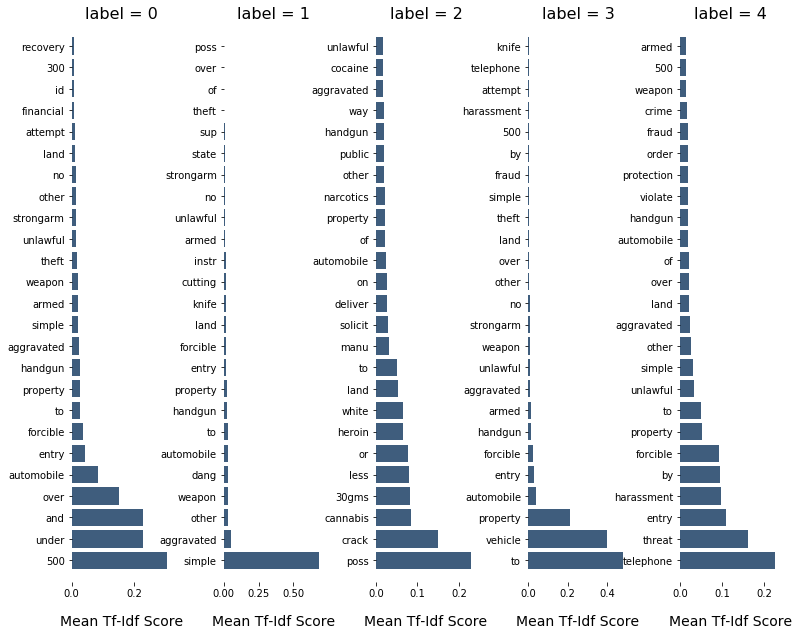

In [63]:
plot_tfidf_classfeats_h(dfs)

In [64]:
centroidsLabels = pd.read_csv("../../crimesInChicagoData/Unsupervised-MachineLearning/finalProject/year2001_5clusterCentroids.csv") 

In [66]:
centroidsLabels

Unnamed: 0  index  IUCR     Primary Type       Description  \
0           0     32   820            THEFT    $500 AND UNDER   
1           1      6   460          BATTERY            SIMPLE   
2           2   1551  2027        NARCOTICS       POSS: CRACK   
3           3     18  1320  CRIMINAL DAMAGE        TO VEHICLE   
4           4    132  2820    OTHER OFFENSE  TELEPHONE THREAT   

  Location Description  Arrest  Domestic  District    Year  Month  Day  Hour  
0               STREET   False     False       8.0  2001.0     10   15    22  
1               STREET   False     False       2.0  2001.0      3    1    19  
2               STREET    True     False      11.0  2001.0      2   27    20  
3               STREET   False     False       3.0  2001.0     11    1    14  
4            RESIDENCE   False     False       6.0  2001.0      1    9    17